# Hello again 🫡

## in Today's session we will discuss a lot of topics about The phases before creating any ML model (Pre-Processing the data and data Understanding!)

## So why do we need to understand the data , why can't we just plug it in any ML model and continue our lives ? 🥸

<img src="image.png" alt="image" width="460" height="420"/>

---

## This Image Sums Up the Whole Pipeline of Any Good ML Project �

- If we don’t understand our data well → **Bad data preparation** → **Wrong model selection** → **Bad model building** → **Bad model evaluation**. 🚫
- Then, you’ll be stuck at the dilemma: *Why is my model performing poorly on my data?* 🤔
- Maybe it’s a data problem? 🗂️ Bad quality data? Or maybe the wrong model? 🤖 Should I just change it to a different one? (Endless loop 🔁)

**The Answer:** You’re going to be stuck in this loop if you don’t admit that it’s not a data issue or a model issue—it’s a **you** issue. (Aywa enta el mushkela yasta 😆)

maybe the issue lies in **understanding the data itself** and **processing it correctly**! 🛠️

---

## so before we start let me introduce a friend of mine (PS : he's going to be your friend too 👀)

<img src="Wizard.png" alt="image" width="460" height="420"/>


## **okay enough with the yapping buckle up 🤠 and let's start our journey**

## so let's imagine a story together 
 - Act 1 : you saw someone that u like and said yeah I've to get her number     <br>  (PS : the other person here is our Target column in our Data !😆) 
 - so you went to her tried to start a convo and get her number and u got it horray 🥳

 
## Act 2 
 - you asked the data wizard (your new best friend) what to do now ? 

 - He replied : **Now you have to gather more info about her**

<img src="wizard2.jpg" alt="image" width="360" height="320"/>

## so you started your stalking stage and searched for her facebook account or any social media account (the data source)
### and Abracadabra 😗 you found it so you are going to get the primary info about her 

## so let's check our Workflow here 

1. **Understand the problem.**  
   We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. **Univariable study.**  
   We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. **Multivariate study.**  
   We'll try to understand how the dependent variable and independent variables relate.

4. **Basic cleaning.**  
   We'll clean the dataset and handle the missing data, outliers, and categorical variables.

5. **Test assumptions.**  
   We'll check if our data meets the assumptions required by most multivariate techniques.

In [37]:
# importing the libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# now let's get her (the Data)

# load the data into a dataframe

data_path = r"house-prices-advanced-regression-techniques\train.csv"

df = pd.read_csv(data_path)

# now let's see what we got

display(df.head(5)) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# don't panic let's check the Dimensions of the data 

df.shape

(1460, 81)

### now you can panic like WTH i'm going to do with 81 cols (80 features) 💀

In [5]:
# okay let's continue 

# let's check the column names 

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Damn that's a lot right ? okay so let's simplify things a little bit as this is our first time doing EDA (Exploratory data analysis)

## Univariable analysis

In [6]:
# Since I want to focus more about our Target column or the dependent variable (the target we want to predict)
# it's the 'SalePrice' column 

# so let's gather some info about it 

display(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### we mainly focus here on min max and mean values

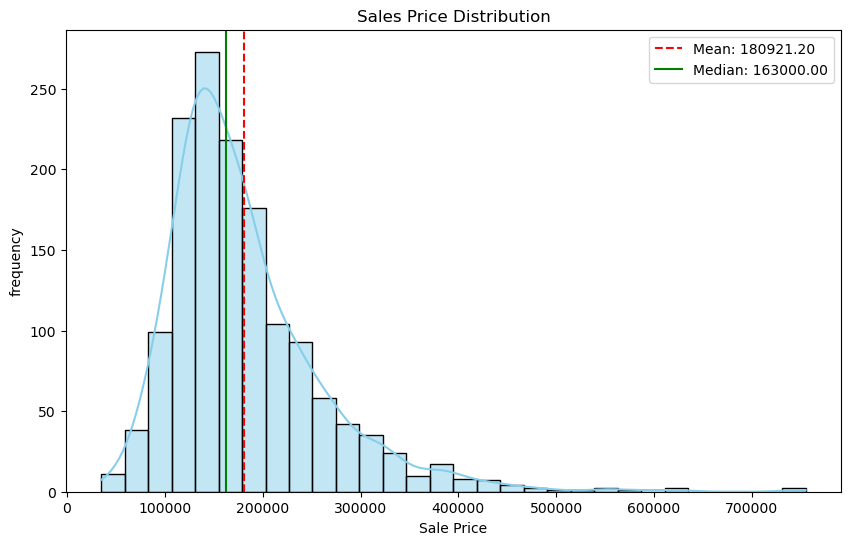

In [11]:
# now let's check the histogram about our target

def plot_dist(column , x_label, title ,y_label='frequency'):

    plt.figure(figsize=(10, 6))
    sns.histplot(column, kde=True, color='skyblue',bins=30)
    
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    mean= column.mean()
    median = column.median()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', label=f'Median: {median:.2f}')
    
    plt.legend()
    
    plt.show()


plot_dist(column=df['SalePrice'] , x_label='Sale Price',title= 'Sales Price Distribution')

### Let's understand what we got from this plot ? 
    - Deviate from the normal distribution 
    - so our target variable has a postive skewness (Right skewed)

In [ ]:
# let's get more info from 'SalePrice'

print(f"Skewness Value is : {df['SalePrice'].skew()}")

# yup it confirms what we got from the graph +ve skewness

Skewness Value is : 1.8828757597682129


## So u asked you friend the data wizard , so what ? why do we care if the data is skewed or not ? 🤔

### He slapped you and said of course we care many of the ML models assume that the data is normally distributed 

### we will see later how we can cure that skewness 

- Approximately Symmetrical:<br>
    Skewness between -0.5 and 0.5 is often considered reasonably symmetrical.
- Moderately Skewed:<br>
    Skewness between -1 and -0.5 (negative) or 0.5 and 1 (positive) indicates a moderately skewed distribution.
- Highly Skewed:<br>
    Skewness less than -1 (negative) or greater than 1 (positive) indicates a highly skewed distribution.



## Now let's extend our research area to 'SalePrice' and her buddies

### okay so i'm going to select some of the features not all due to the complexity and the time of the session (i'll explain why i used these features in the session)

 - OverallQual --> rates the overall material and finish of the house 
 - YearBuilt --> Original construction date
 - TotalBsmtSF --> Total square feet of basement area
 - GrLivArea --> Above grade (ground) living area square feet

## Relationship with numerical variables

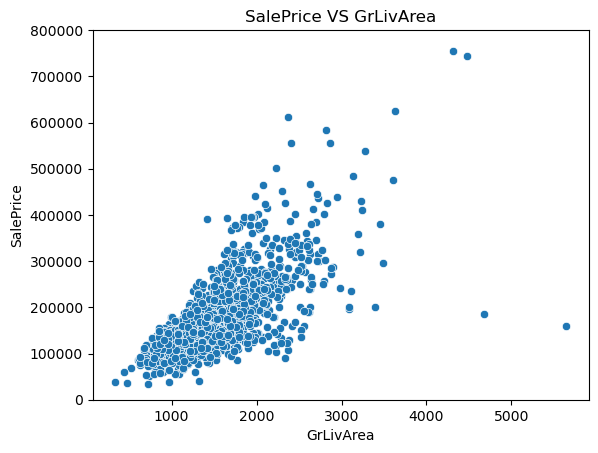

In [ ]:
# Scatter plot of 'SalePrice' and GrLivArea

sns.scatterplot(data= df , y = 'SalePrice' , x='GrLivArea')
plt.ylim(0,800000)
plt.title('SalePrice VS GrLivArea')
plt.show()

### So you asked the data wizard again and asked, "What does that mean?" 🧙‍♂️  
- He said, "It looks like **SalePrice** and **GrLivArea** are old friends!"  
- They have a **linear relationship** between them!  
- So it means that **SalePrice** always considers the advice of **GrLivArea**.  
  (In ML lingo: The independent variable here affects the dependent a lot and gives it so much info! 📊)


### Okay so what about **'TotalBsmtSF'** ?

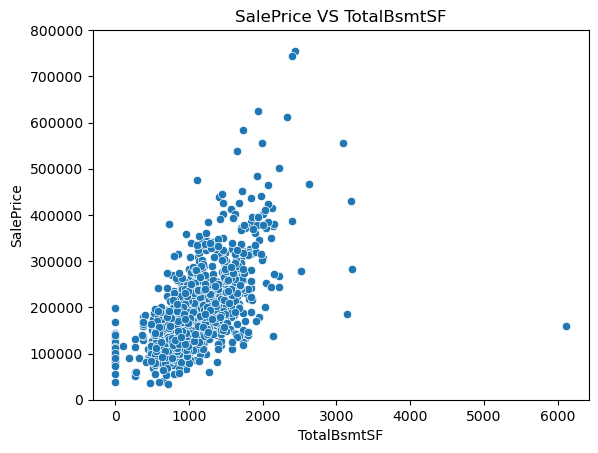

In [22]:
# scatter plot between 'TotalBsmtSF' and SalePrice

sns.scatterplot(data = df , y = 'SalePrice' , x='TotalBsmtSF')
plt.ylim(0,800000)
plt.title("SalePrice VS TotalBsmtSF")
plt.show()

### Wow so it seems that 'TotalBsmtSF' is also a great friend of SalePrice but there relationship has a little bit of spice it grows (exponentially) 🤨

## Relationship With Categorical Features

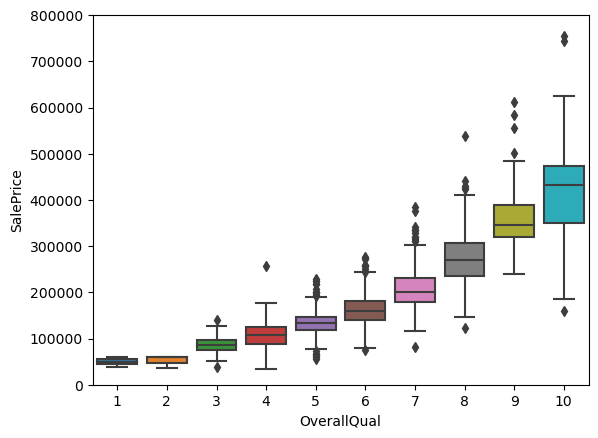

In [24]:
#box plot overallqual/saleprice

sns.boxplot(data = df , y = "SalePrice" , x='OverallQual')
plt.ylim(0,800000)
plt.show()

### Yup it looks like 'SalePrice' enjoys 'OverallQual'

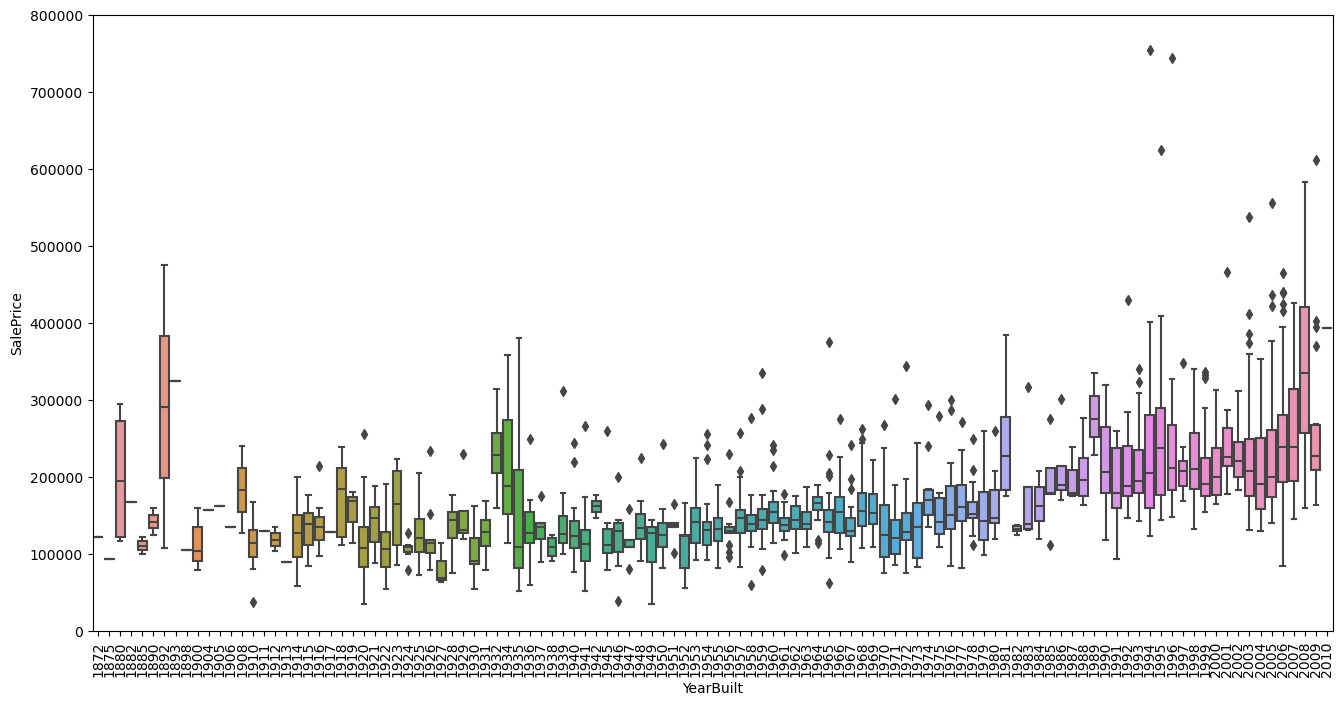

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(data= df , y = 'SalePrice' , x='YearBuilt')
plt.ylim(0,800000)
plt.xticks(rotation = 90)
plt.show()

### As expected SalePrice is more prone to spend money in new stuff than some old junk 😆
### PS : you can also do some Time Series Analysis here 

### In summary 📝  
Stories aside, we can conclude that:  

- **'GrLivArea'** and **'TotalBsmtSF'** seem to be **linearly related** with **'SalePrice'**. Both relationships are **positive**, meaning as one variable increases, the other also increases. 📈  
  (In the case of **'TotalBsmtSF'**, the slope of the relationship is particularly steep!)  

- **'OverallQual'** and **'YearBuilt'** also seem to have a relationship with **'SalePrice'**.  
  The connection is **stronger** for **'OverallQual'**, where the box plot shows how sales prices **increase** with overall quality. 🏆 

### So we just checked our 4 Variables that we agreed on how about the others ?   

## Correlation Matrix

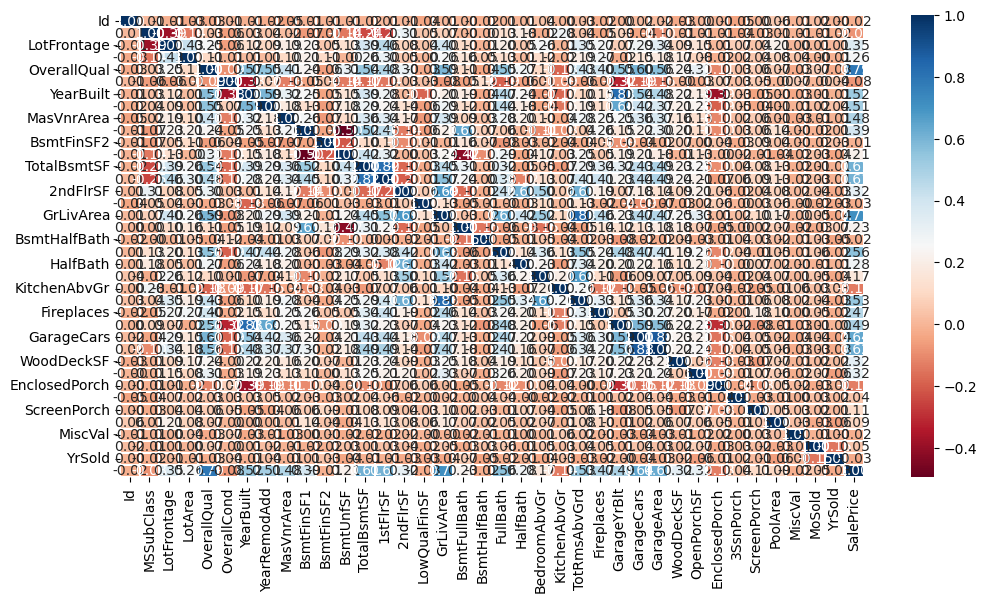

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=corr , cmap='RdBu' , annot=True , fmt='0.2f' , linewidth = 0.1)
plt.show()

### That's a nightmare not a correlation matrix 💀
### Okay let's fix it ! 

![alt text](https://media1.tenor.com/m/Io5URk9UVpQAAAAd/voldemort-harry-potter.gif)

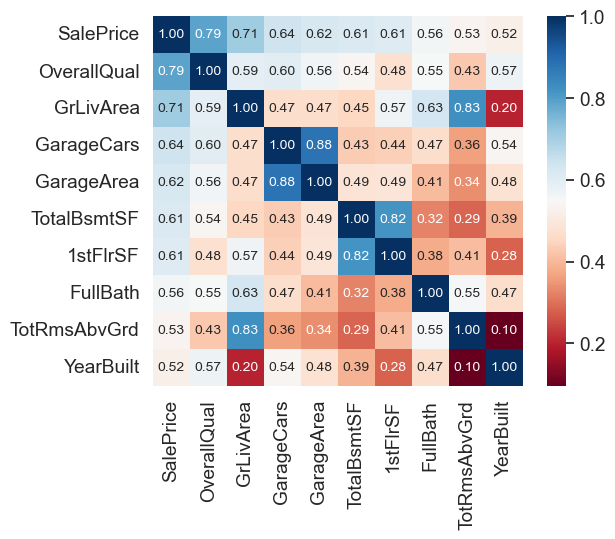

In [41]:

cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, cmap='RdBu',square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Yeah that's better 
<img src="https://media1.tenor.com/m/RugXg8EGPBgAAAAC/feeling-rough-voldemort.gif" width="400">


### Anyway what can we get from this heatMap ? 
### A lot of points : 
- **'OverallQual'**, **'GrLivArea'**, and **'TotalBsmtSF'** are **strongly correlated** with **'SalePrice'**. **Check!** ✅  
- **'GarageCars'** and **'GarageArea'** are also highly correlated. But, as we discussed earlier, the number of cars that fit into the garage is a consequence of the garage area. **'GarageCars'** and **'GarageArea'** are like **twin brothers**—you’ll never be able to tell them apart! So, we just need one of these variables in our analysis (let’s keep **'GarageCars'** since its correlation with **'SalePrice'** is higher).  (trying to prevent collinearity 🤫)
- **'TotalBsmtSF'** and **'1stFloor'**? Yep, they’re **twin brothers** too. We’ll keep **'TotalBsmtSF'** just to prove our first guess was right (re-read **'So... What can we expect?'**).  
- **'FullBath'**?? Really? 🛁  
- **'TotRmsAbvGrd'** and **'GrLivArea'**? Twin brothers **again**! Is this dataset from **Chernobyl**? ☢️  

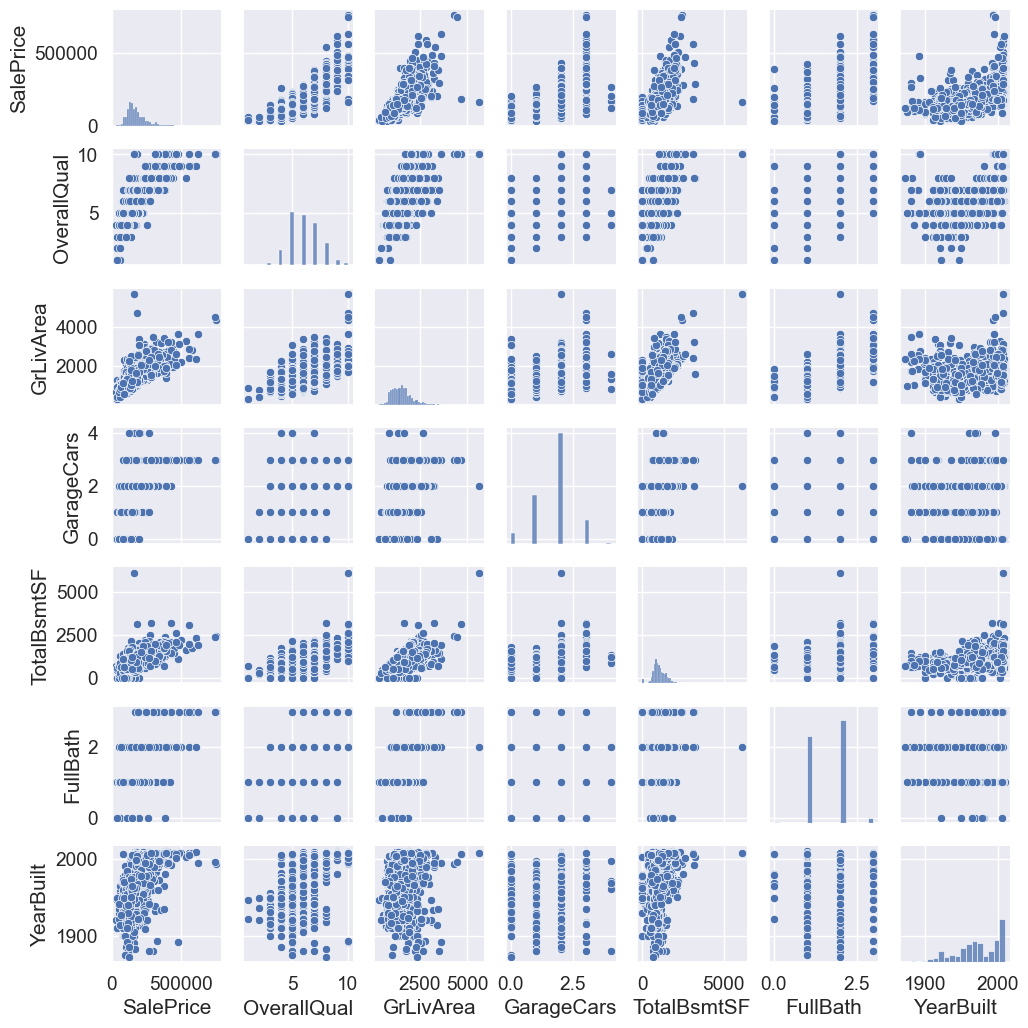

In [45]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# I'm so lazy to make scatter plots for each one let me show u magic trick !

sns.pairplot(df[cols] , height=1.5)
plt.show()

### we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.
### One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'

## Now Missing Data
### Important questions to ask when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

### there are various ways to handle missing data 
- replace it with the mean or the mode or the median
- use a KNN imputer to replace it 
- create a ML model just to replace the missing data based on the existing one 
- Simply drop them 🫣

In [46]:
#missing data
total = df.isnull().sum().sort_values(ascending=False) # -> getting the total number of missing data

percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False) # now the % of it in every column

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

display(missing_data.head(20))

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


### let's agree on something if the % of the data missing is more than 15% you need to think about dropping it 
### I'm not going to do this here I'm just going to drop them all for simplicity except for the Electrical column i'm just going to drop the rows that's missing

<img src="https://media1.tenor.com/m/UGLkFpDi-vsAAAAC/avada-kedavra.gif" width="400">

In [47]:
# Dropping the missing data

df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

## Out liars!

### Outliers is something that we should be aware of it , why ? because it can ruin our data and make our model biased towards a certain values

### Since it's a complex topic i'm just going to use the normal way the IQR method to handle it not the std one

In [60]:
# let's define the 2 functions 1st 

# Handling outliers
def remove_outlier(df , column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = (IQR*1.5) + Q3
    lower_limit = Q1 - (IQR*1.5)
    
    df_filtered = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_filtered



def box_plot(column):
    sns.boxplot(x=column ,palette="Set2",showmeans=True)
    plt.show()

### I'm going to apply it on the 'GrLivArea' variable but u can apply it on any numerical continous feature too !

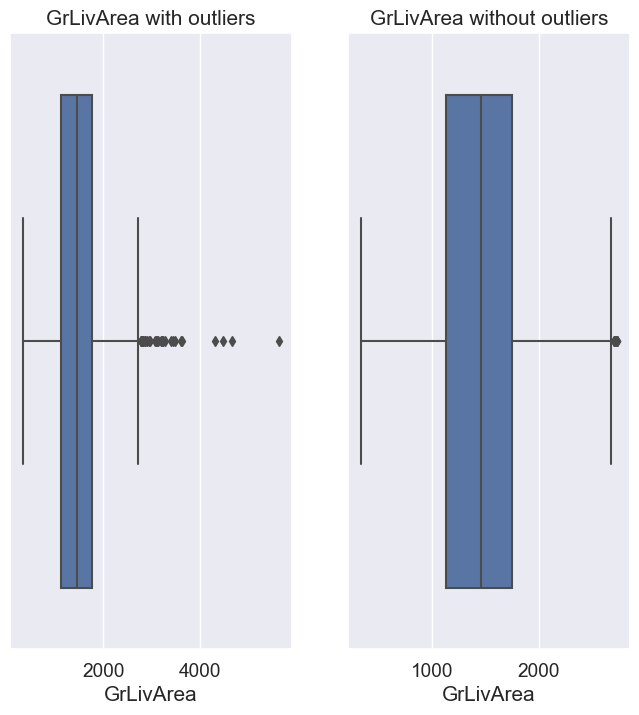

In [63]:
df_filtered = df.copy()
df_filtered = remove_outlier(df , 'GrLivArea')

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

sns.boxplot(data = df , x = 'GrLivArea' , ax=axes[0])
axes[0].set_title("GrLivArea with outliers")


sns.boxplot(data = df_filtered , x = 'GrLivArea' , ax=axes[1])
axes[1].set_title("GrLivArea without outliers")

plt.show()

In [66]:
# After and before 

df_filtered['GrLivArea'].shape , df['GrLivArea'].shape

((1428,), (1459,))

## Data Transformation

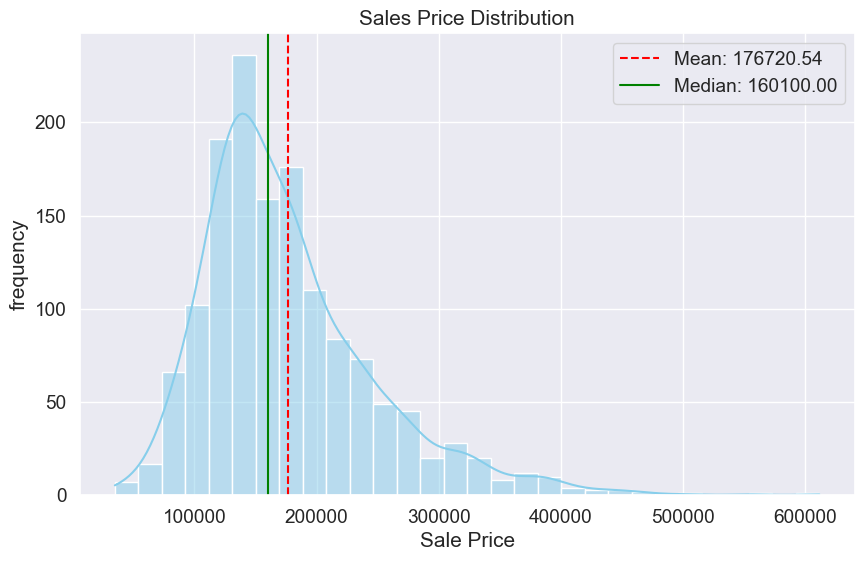

In [67]:
# let's have a look at the Sales Price distribution again !

plot_dist(column=df_filtered['SalePrice'] , x_label='Sale Price',title= 'Sales Price Distribution')

### How can we cure that skewness ? 🤔

### we can apply tranformation like (Power transformer or Standard scaler or min max scaler !)

### in our case here i'll use Power Transformer because of the skewness !

In [70]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')

df_filtered['SalePrice'] = transformer.fit_transform(df_filtered[['SalePrice']])

C:\Users\ziad\AppData\Local\Temp\ipykernel_19888\3522788411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SalePrice'] = transformer.fit_transform(df_filtered[['SalePrice']])


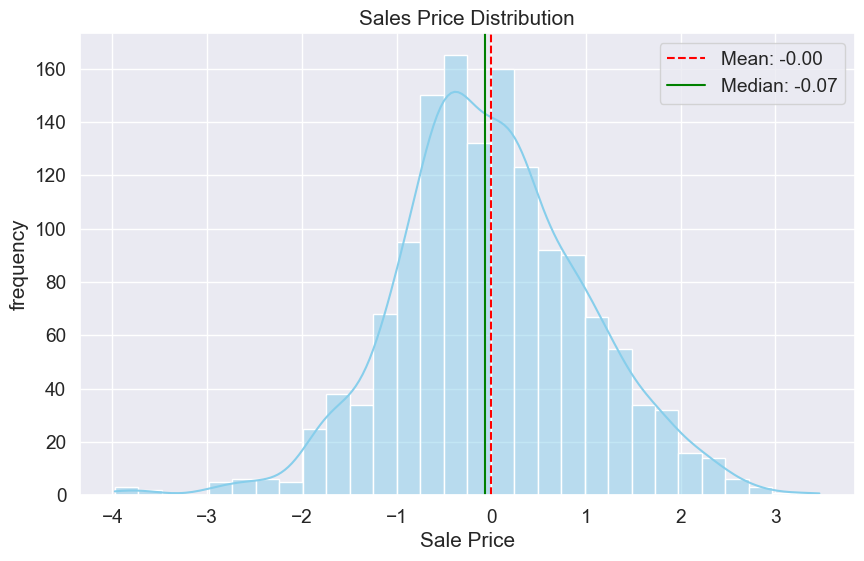

In [71]:
# now let's plot it again 

plot_dist(column=df_filtered['SalePrice'] , x_label='Sale Price',title= 'Sales Price Distribution')

### Now that's so much better ! 

## Categorical features !

### if the variable isn't ordinal then use -> one hot encoding (most of the time it would be fine !)
### if it's u can use -> odinal encoding 
### if u have only to values (eg. Gender ) -> then use Label encoding {male : 1 , female : 0} !

In [72]:
#convert categorical variable into dummy
df_filtered = pd.get_dummies(df_filtered)

In [73]:
display(df_filtered.head())

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [75]:
display(df['MSZoning'].value_counts())

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64